## GIbbs samplers 



### 1
Assume that $x|\theta - Bin(n,\theta)$, $\theta - Be(a,b)$

we want to sample the joint distribution

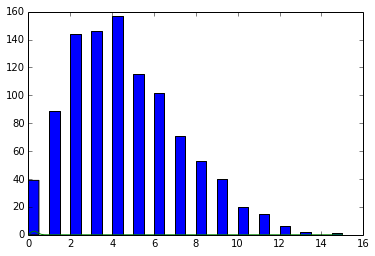

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import  scipy.stats  as st
%matplotlib inline

def ecdf(x):
    x= x / np.sum(x)
    return np.cumsum(x)
a=3
b=7
n = 15
x=[]
theta=[]
## start gibbs sampling
T = np.random.beta(a,b)
theta.append(T)
x.append(np.random.binomial(n,T))
for i in range(1,1000):
    x_pesdo = np.random.binomial(n,theta[-1])
    x.append(x_pesdo)
    T_pesdo = np.random.beta(a+x[-1],n-x[-1]+b)
    theta.append(T_pesdo)

### 

plt.hist(x,bins=30)
plt.show()
###for i in range(0,100):
## x.append(np.random.binomial(T[-1])

### 2
we assume that 

$x_i - N(\theta,\sigma^2)$

$\theta - N(\theta_{0},\tau^2$

$\sigma^2 - inv_gamma(a,b)$

we want to sample from the posterior $N(\theta,\sigma^2|x)$

16
6.77078942391
4.91265488574
[0.05137370375159322, 0.0001637275124549423, 0.01618347596358274, 0.4118629756136731]


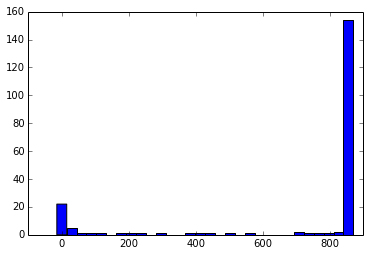

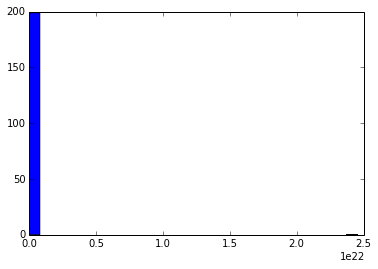

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
### assumption
a = 3
b = 3
theta_0 = 5
tau = np.power(10,0.5)

x=[91,504,557,609,693,727,764,803,857,929,970,1043,1089,1195,1384,1713]
n = len(x)
print n
###initilize
theta =1.0
sigma_square = 100.0
theta_array=[]
sigma_array=[]
print np.log(872)
print np.log(136)

### start gibbs_sampling
for i in range(0,1000):
    aaa = theta_0*sigma_square/(sigma_square+n*np.power(tau,2))
    bbb = n*np.power(tau,2)/(sigma_square+n*np.power(tau,2))*np.mean(x)
    theta_mean = aaa+bbb
    theta_vari = sigma_square*np.power(tau,2)/(sigma_square+n*np.power(tau,2))
    theta  = np.random.normal(theta_mean,theta_vari)
    theta_array.append(theta)
    sigma_a= n/2.0+a
    sigma_b = 0.5*np.sum(np.array([np.power(i-theta,2) for i in x]))+b
    sigma_square = 1/np.random.gamma(shape=1/sigma_a,scale=sigma_b)
    sigma_array.append(sigma_square)

ll=[]
'''
for i in range(0,1000):
    ll.append(st.invgamma.rvs(2,30))
plt.xlim([0,100])
plt.hist(ll,bins=200)
plt.show()
'''
plt.hist(np.array(theta_array[-200:]),bins=30)
plt.show()
plt.hist(np.array(sigma_array[-200:]),bins=30)
plt.show()

### 3 
$(z,a-z,b,c,d)$-$M(n;1/2,\theta /4,0.25*(1-\theta),0.25*(1-\theta),\theta/4$
we only know a,b,c,d.
We want to find the true theta

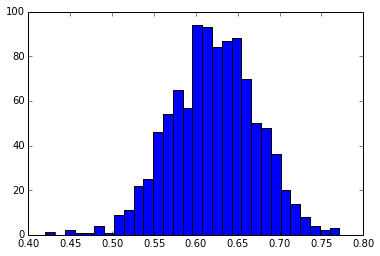

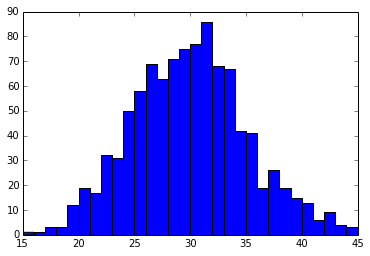

In [120]:
import numpy as np
import matplotlib.pyplot as plt
## asumption
a=125
b=18
c=20
d=34
theta=1.0
z=1.0
theta_array=[]
z_array=[]
for i in range(0,1000):
    theta = np.random.beta(z+d+1,b+c+1)
    theta_array.append(theta)
    z = np.random.binomial(a,theta/(2+theta))
    z_array.append(z)

plt.hist(theta_array,bins=30)
plt.show()
plt.hist(z_array,bins=30)
plt.show()